# **PROBLEMA**

Se nos ha pedido realizar una reducción de dimensionalidad para la visualización del conjunto de entrenamiento del apartado anterior con el objetivo de intentar encontar información extra que nos ayude a comprender mejor que afecta a la visualización de una canción.

# **Lectura de datos**

Primeramente extraemos los datos de los ficheros proporcionados. Como la vez anterior, accedemo a través de github.

In [ ]:
import pandas as pd

# Ocultar warnings que no son relevantes para la presentación
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

URL_TRAIN = "https://raw.githubusercontent.com/MarioGRBlanco/MCP/main/train_ap1_mcp_23_24_train.csv"

X = pd.read_csv(URL_TRAIN, sep=",") # Dataset de entrenamiento

display(X)

,song_name,song_id,popularity,acousticness,danceability,song_duration_ms,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,I’ll Come Running (To Tie Your Shoe),782579,34,0.5350,0.584,218227,0.459,0.034200,0,0.1530,-14.127,0,0.0319,124.465,3,0.7650
1,Mohican,150969,47,0.3210,0.758,206600,0.503,0.000234,0,0.1210,-11.445,0,0.1600,120.027,3,0.4770
2,"Todo Quedó, Quedó (En Vivo) [feat. Nelsón Arri...",261974,25,0.1680,0.732,304970,0.824,0.000021,11,0.9420,-9.296,0,0.1170,102.002,3,0.8260
3,Be Glorified,360055,39,0.0726,0.553,307040,0.718,0.000003,8,0.1520,-6.385,0,0.0248,87.989,3,0.6770
4,Guilty Pleasure,745239,57,0.0032,0.641,204435,0.844,0.000000,9,0.1060,-5.758,0,0.0465,150.030,3,0.8340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,Make Me Wanna,74370,62,0.0369,0.545,225067,0.818,0.000000,0,0.1010,-6.380,0,0.0541,109.019,2,0.6790
23996,Maui Battles - Score Demo,19552,41,0.2350,0.232,117733,0.587,0.918000,1,0.3950,-13.186,1,0.1010,81.943,3,0.1130
23997,6 Concerts transcrits en sextuor / 6e concert:...,549733,15,0.8900,0.624,248733,0.269,0.879000,8,0.1200,-20.798,1,0.0391,128.212,2,0.3820
23998,"Puccini: La bohème, Act 1: ""O soave fanciulla""...",884432,13,0.9780,0.196,248307,0.134,0.026100,5,0.1180,-13.981,1,0.0365,84.730,3,0.0386


# **PREPROCESAMIENTO**

Como se vio en el apartado anterior, el primer atributo del dataset es de tipo objeto. En este caso texto plano, eliminamos esta columna por ser irrelevante y dar problemas al no poder analizarse numericamente.

In [ ]:
X_clean = X.copy()

del X_clean["song_name"]

# **DEFINICIÓN DE PASOS**

Para intentar encontrar la mejor visualización para el dataset, emplearemos distintos algoritmos de reducción de dimensionalidad con distintas visualizaciones con el objetivo de potenciar una posible mayor comprensión del mismo.

En concreto, emplearemos **PCA**, **ISOMAP** y **T_SNE**.

# **PCA. ANÁLISIS Y VISUALIZACIÓN**

Primeramente, pasaremos a comprobar si tiene sentido una reducción bidimensional del conjunto de datos. Para ello haremos uso de la curva de varianza.

Text(0, 0.5, 'Varianza explicada')

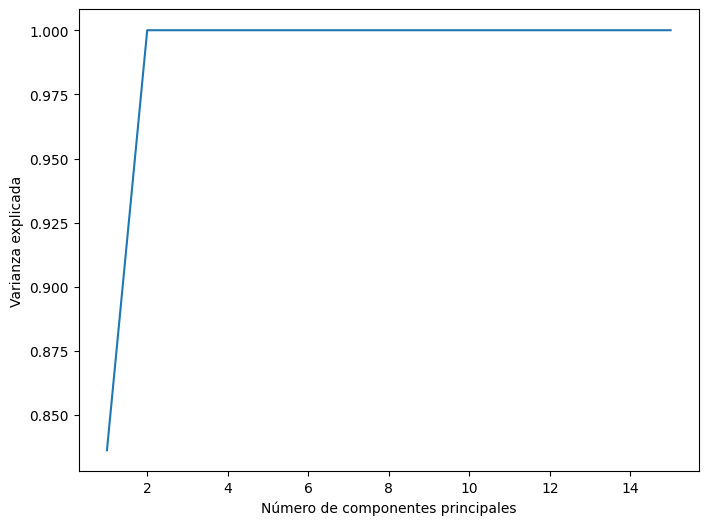

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=15).fit(X_clean)
plt.figure(figsize=(8,6))
xx = np.arange(1, 16, step=1)
yy = np.cumsum(pca.explained_variance_ratio_)
plt.plot(xx, yy)
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada')

Comprobamos que efectivamente con únicamente dos componentes principales somos capaces de explicar aproximadamente el 100% de la varianza. Visto esto, hacemos una reducción de dimensionalidad.

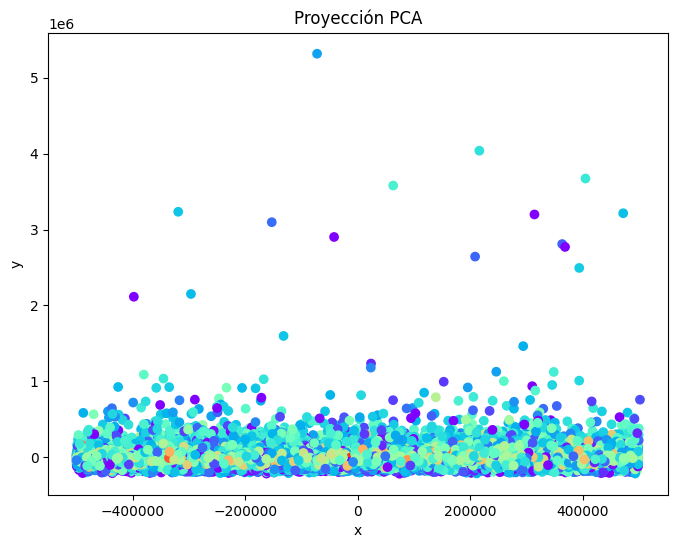

In [ ]:
X_low = PCA(n_components=2).fit_transform(X_clean)

plt.figure(figsize=(8,6))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Proyección PCA')
plt.scatter(X_low[:,0], X_low[:,1], c = X_clean["popularity"],  cmap='rainbow')
plt.show()

Como obersvamos en el gráfico que representa PCA, no parece que podamos extraer ningún tipo de conclusión de él.
No se identifican aparentemente ningún cluster ni cualquier otro indicio que pueda aportarnos información útil.
Lo único que parecemos observar es una agrupación de los puntos representados por colores cálidos en la coordenada 0 del eje
"y" y a todo a lo largo del eje "x". Para intentar entender esto realizamos una representación 3d con "popularidad" en el eje z.

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(x = X_low[:, 0], y = X_low[:, 1], z = X_clean["popularity"], mode = 'markers', marker = dict(size = 7, color = X_clean["popularity"], colorscale = 'rainbow', opacity = 0.8))])

fig.show()

La representación 3d nos permite ver que debajo de la agrupación de colores calidos existen datos en toda la area de los ejes "x" y "y", formando un cuadrado. La visualización es representativa de la baja correlación de la popularidad con el resto del dataset, pero dentro de los componentes de este la correlacion varia.

Hacemos ahora una reducción de dimensionalidad limitandonos a 6 columnas elegidas mediante selectkbest.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X_less = X_clean.copy()

del X_less["popularity"]

selector = SelectKBest(f_classif, k=6)

X_T = selector.fit_transform(X_less, X["popularity"])

Representamos de nuevo mediante PCA:

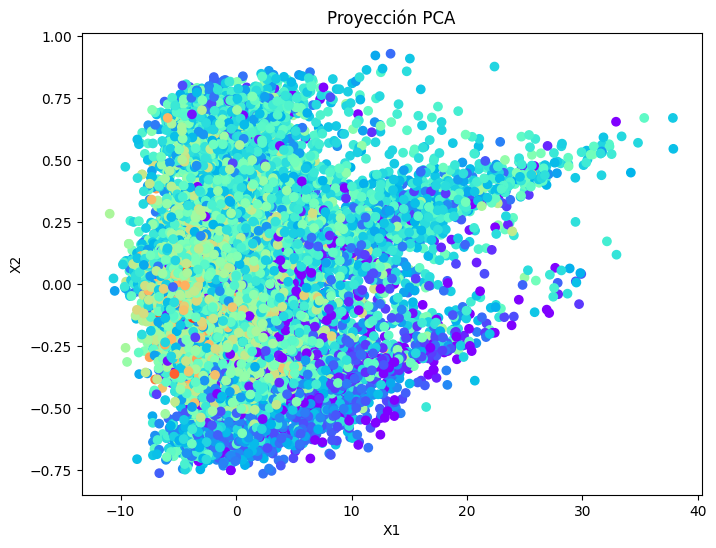

In [ ]:
X_low2 = PCA(n_components=2).fit_transform(X_T)

plt.figure(figsize=(8,6))
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Proyección PCA')
plt.scatter(X_low2[:,0], X_low2[:,1], c = X_clean["popularity"],  cmap='rainbow')
plt.show()

La diferencia es obvia inmediatamente, con concentraciones diferenciables de colores calidos y frios, así como un paso más progresivo de uno al otro.
Realizando una representación 3d vemos:

In [ ]:
fig = go.Figure(data=[go.Scatter3d(x = X_low2[:, 0], y = X_low2[:, 1], z = X_clean["popularity"], mode = 'markers', marker = dict(size = 7, color = X_clean["popularity"], colorscale = 'rainbow', opacity = 0.8))])

fig.show()

Y ahora el grafico toma forma de rampa. Esto es representativo de correlación de los datos con dimensionalidad reducida y la popularidad, aunque como se ve por la variabilidad de valores del eje "z", sobre todo en x=0, esta correlación es debil.

# **ISOMAP: ANÁLISIS Y VISUALIZACIÓN**



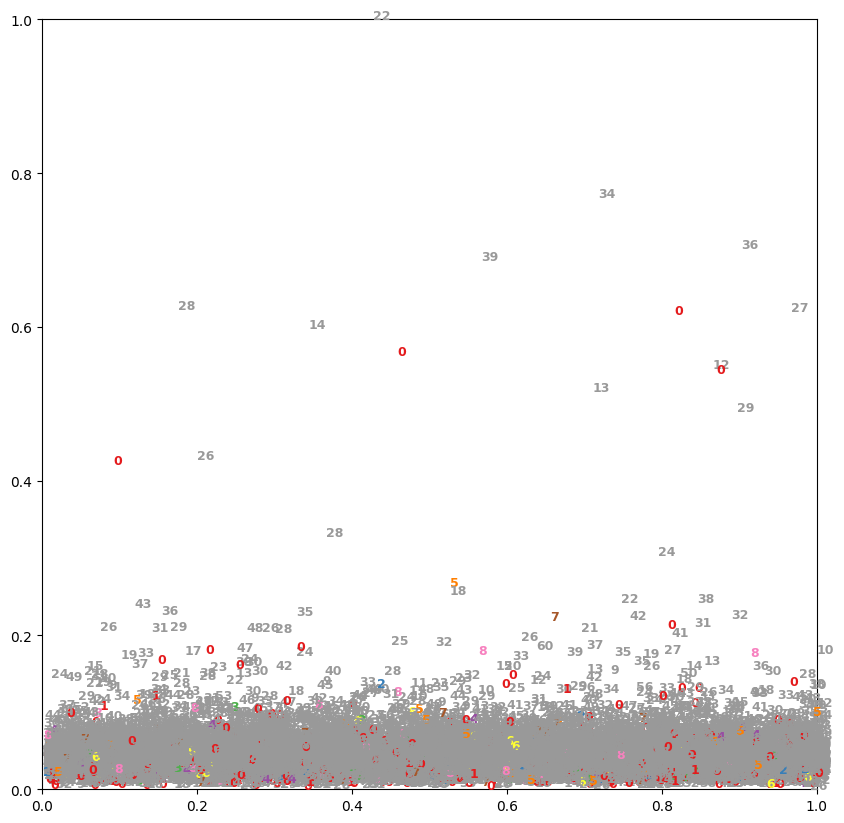

In [ ]:
from sklearn.manifold import Isomap
isomap = Isomap(n_neighbors=30, n_components=2)
X_projected = isomap.fit_transform(X_clean)

# normalización de los datos
x_min, x_max = np.min(X_projected, 0), np.max(X_projected, 0)
X_projected = (X_projected - x_min) / (x_max - x_min)
# definición de los datos
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
for i in range(X_projected.shape[0]):
    plt.text(X_projected[i, 0], X_projected[i, 1], str(X_clean["popularity"][i]),
    color=plt.cm.Set1(X_clean["popularity"][i] / 10.),
fontdict={'weight': 'bold', 'size': 9})

# **T-SNE, ANÁLISIS Y VISUALIZACIÓN**



(([], []), ([], []))

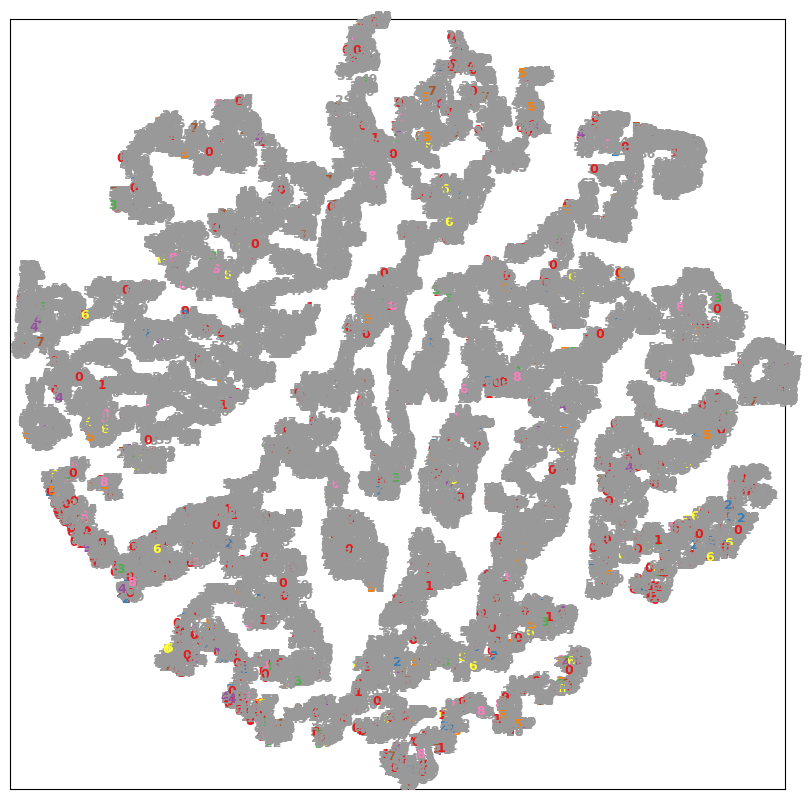

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn.manifold import TSNE
perplexity = 34 #@param {type: "slider", min: 5, max: 50, step: 1}
tsne = TSNE(n_components=2, perplexity=perplexity)
X_projected = tsne.fit_transform(X_clean)
# normalizacion de los datos
x_min, x_max = np.min(X_projected, 0), np.max(X_projected, 0)
X_projected = (X_projected - x_min) / (x_max - x_min)
y = X_clean["popularity"]

plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
for i in range(X_projected.shape[0]):
 plt.text(X_projected[i, 0], X_projected[i, 1], str(y[i]),
 color=plt.cm.Set1(y[i] / 10.),
 fontdict={'weight': 'bold', 'size': 9})

plt.xticks([]), plt.yticks([])

Ahora probamos a realizar la representación T-SNE con los valores seleccionados por selectKbest:

In [ ]:
X_proyected2 = tsne.fit_transform(X_T)

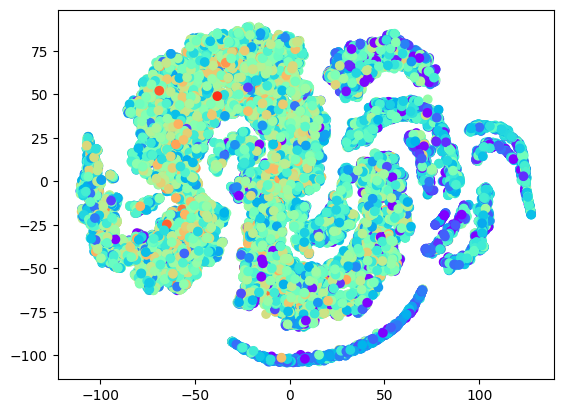

In [ ]:
plt.scatter(X_proyected2[:, 0], X_proyected2[:, 1], c = X_clean["popularity"],  cmap='rainbow')
plt.show()

# **CONCLUSIÓN**

Como vemos, y en coherencia con lo observado en el primer apartado, no somos capaces de observar un aporte de información extra con estas reducciones de dimensionalidad. En 2 de los casos, el resultado es el mismo, un apelotamiento general de los datos (PCA E ISOMAP) mientras que en el diagrama de T-SNE surge una forma "curiosa", sin embargo (quizá debido a mala interpretación/programación) no somos capaces de extraer información significativa que ayude a entender que afecta a la variable popularidad.